In [1]:
# ----------------------------- STEP 1: Import Libraries ----------------------------- #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries loaded.")


Libraries loaded.


In [2]:
# ----------------------------- STEP 2: Load and Clean Data ----------------------------- #
file_path = "Patient Master Chart.xlsx"
df = pd.read_excel(file_path)

df.columns = [
    "SL.NO", "AGE", "GENDER", "BBS_Day1", "BBS_Week4", "TUG_Day1", "TUG_Week4", 
    "VRBESS_Day1", "VRBESS_Week4", "BESTest_Day1", "BESTest_Week4", 
    "SIS_Day1", "SIS_Week4"
]

df["GENDER"].fillna(df["GENDER"].mode()[0], inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df["GENDER"] = df["GENDER"].astype(str).str.upper()
df["GENDER"] = df["GENDER"].map({"MALE": 1, "FEMALE": 0})
print("Data loaded and cleaned.")

Data loaded and cleaned.


In [3]:
# ----------------------------- STEP 3: Basic Exploration ----------------------------- #
print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nSummary Stats:")
print(df.describe())

Shape: (60, 13)

Data Types:
SL.NO              int64
AGE                int64
GENDER             int64
BBS_Day1           int64
BBS_Week4          int64
TUG_Day1         float64
TUG_Week4        float64
VRBESS_Day1        int64
VRBESS_Week4       int64
BESTest_Day1       int64
BESTest_Week4      int64
SIS_Day1           int64
SIS_Week4          int64
dtype: object

Summary Stats:
           SL.NO        AGE     GENDER   BBS_Day1  BBS_Week4   TUG_Day1  \
count  60.000000  60.000000  60.000000  60.000000  60.000000  60.000000   
mean   30.500000  55.783333   0.916667  34.816667  46.450000  14.885333   
std    17.464249   7.833201   0.278718   9.164211   4.834288   2.003059   
min     1.000000  41.000000   0.000000  22.000000  40.000000  11.220000   
25%    15.750000  51.000000   1.000000  26.000000  43.000000  12.885000   
50%    30.500000  54.000000   1.000000  33.000000  45.000000  15.930000   
75%    45.250000  60.000000   1.000000  37.250000  48.000000  16.612500   
max    60.000000

In [4]:
# ----------------------------- STEP 4: Improvement Metrics ----------------------------- #
df["BBS_Improvement"] = df["BBS_Week4"] - df["BBS_Day1"]
df["TUG_Improvement"] = df["TUG_Day1"] - df["TUG_Week4"]
df["VRBESS_Improvement"] = df["VRBESS_Week4"] - df["VRBESS_Day1"]
df["BESTest_Improvement"] = df["BESTest_Week4"] - df["BESTest_Day1"]
df["SIS_Improvement"] = df["SIS_Week4"] - df["SIS_Day1"]
print("Improvement metrics created.")

Improvement metrics created.


In [5]:
# ----------------------------- STEP 4b: Add Overall Improvement Score ----------------------------- #
df["Overall_Improvement"] = df[[
    "BBS_Improvement", "TUG_Improvement", "VRBESS_Improvement", 
    "BESTest_Improvement", "SIS_Improvement"
]].sum(axis=1)

print("Overall improvement score calculated.")

Overall improvement score calculated.


In [6]:
# ----------------------------- STEP 5: Missing Value Visualization ----------------------------- #
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing.values, y=missing.index, palette='Reds_r')
    plt.title("Missing Values in Patient Data")
    plt.xlabel("Count")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found.")

No missing values found.


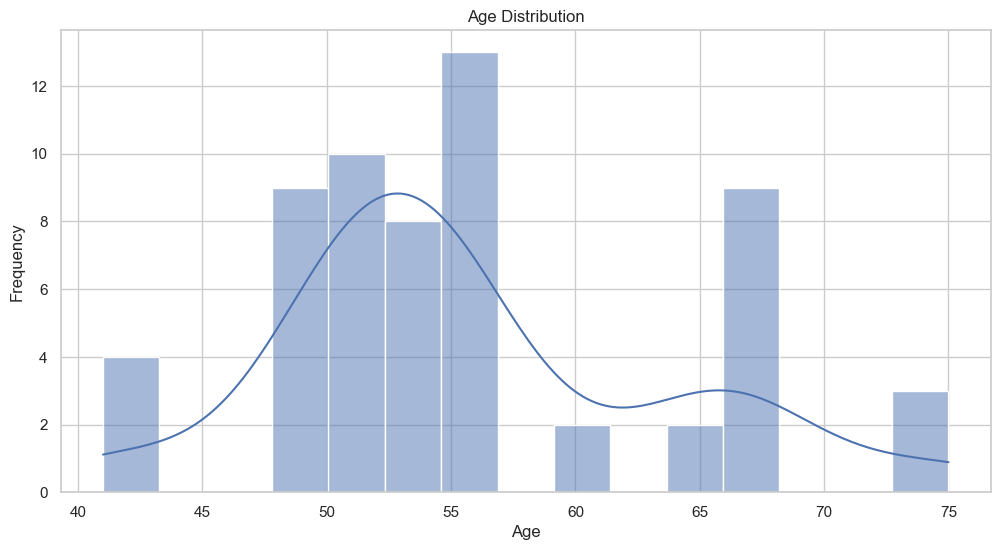

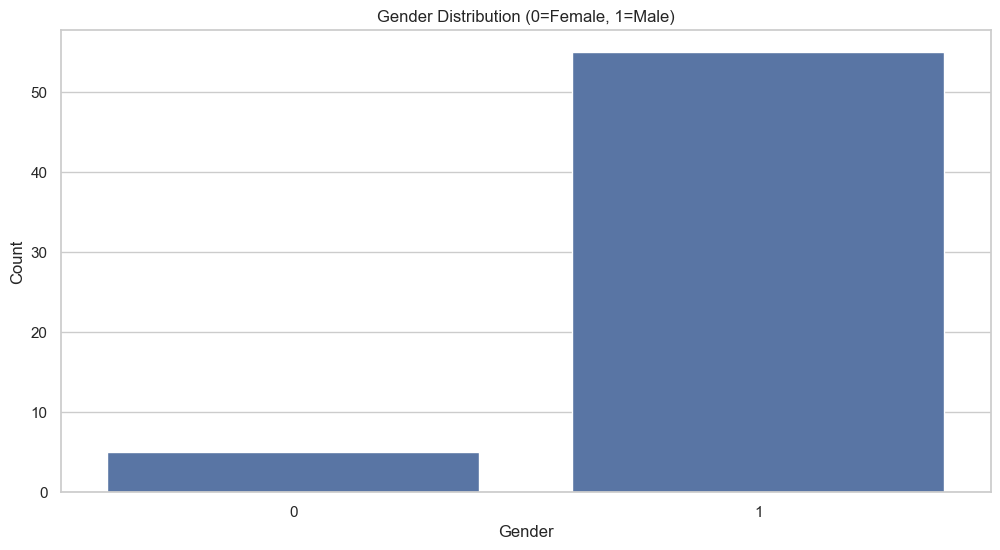

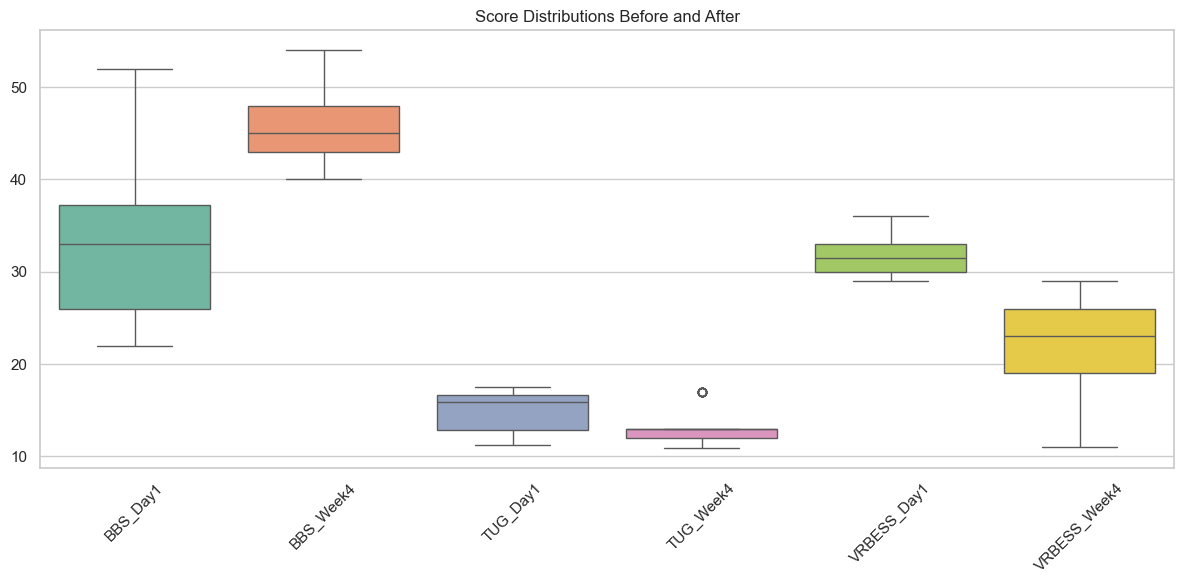

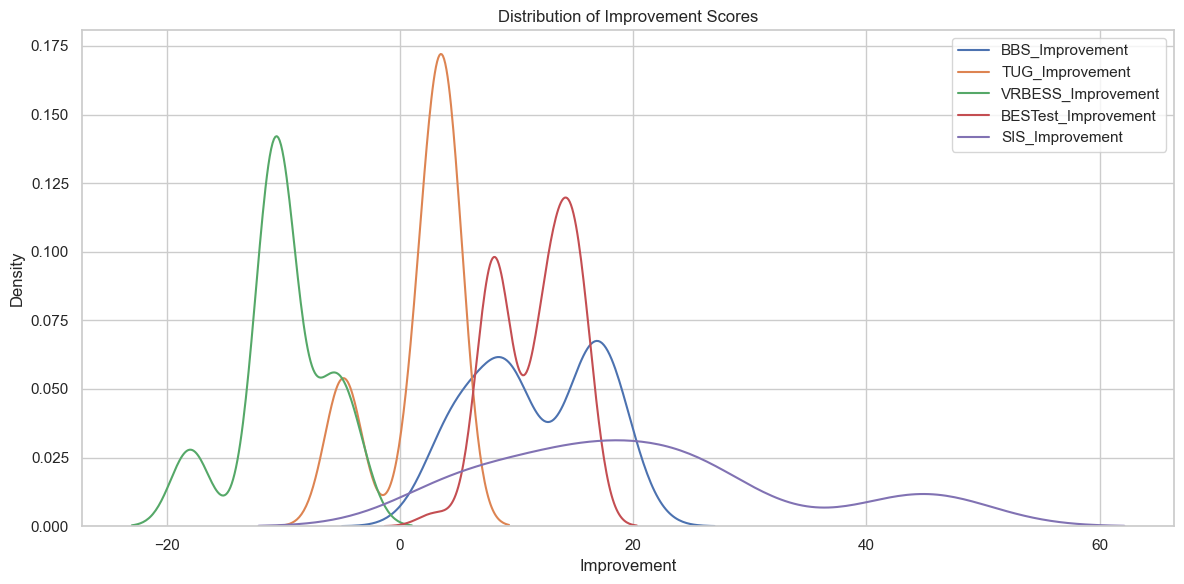

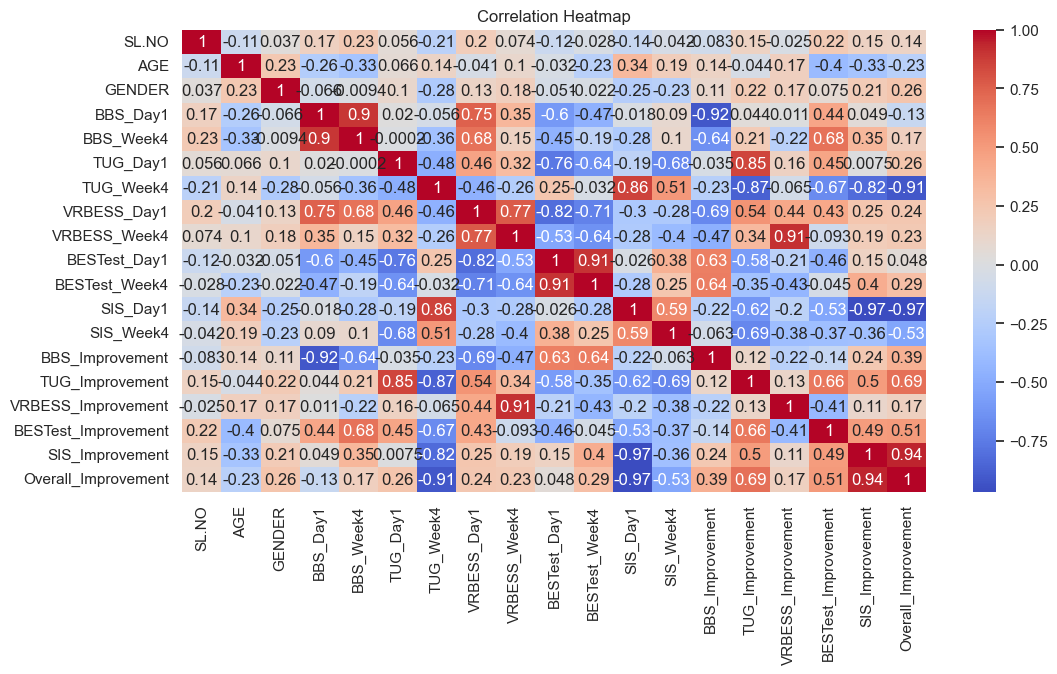

In [7]:
# ----------------------------- STEP 6: Distribution & Comparison Plots ----------------------------- #

# Age Distribution
sns.histplot(df["AGE"], bins=15, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender Count
sns.countplot(x="GENDER", data=df)
plt.title("Gender Distribution (0=Female, 1=Male)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Pre vs Post Score Boxplots
score_cols = ["BBS_Day1", "BBS_Week4", "TUG_Day1", "TUG_Week4", "VRBESS_Day1", "VRBESS_Week4"]
sns.boxplot(data=df[score_cols], palette="Set2")
plt.title("Score Distributions Before and After")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# KDE Distribution of Improvement Scores
improve_cols = ["BBS_Improvement", "TUG_Improvement", "VRBESS_Improvement", "BESTest_Improvement", "SIS_Improvement"]
for col in improve_cols:
    sns.kdeplot(df[col], label=col)
plt.title("Distribution of Improvement Scores")
plt.xlabel("Improvement")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
# ----------------------------- STEP 6b: Statistical Analysis (T-Tests) ----------------------------- #
from scipy.stats import ttest_rel

print("Paired t-tests for Pre vs Post Scores:")

pairs = [
    ("BBS_Day1", "BBS_Week4"),
    ("TUG_Day1", "TUG_Week4"),
    ("VRBESS_Day1", "VRBESS_Week4"),
    ("BESTest_Day1", "BESTest_Week4"),
    ("SIS_Day1", "SIS_Week4"),
]

for pre, post in pairs:
    t_stat, p_val = ttest_rel(df[pre], df[post])
    print(f"{pre} vs {post}: t={t_stat:.2f}, p={p_val:} {'Significant' if p_val < 0.05 else 'Not Significant'}")


Paired t-tests for Pre vs Post Scores:
BBS_Day1 vs BBS_Week4: t=-17.10, p=1.5443444511171943e-24 Significant
TUG_Day1 vs TUG_Week4: t=3.51, p=0.0008712256986344844 Significant
VRBESS_Day1 vs VRBESS_Week4: t=20.55, p=1.4234428649439535e-28 Significant
BESTest_Day1 vs BESTest_Week4: t=-27.58, p=2.097287014493297e-35 Significant
SIS_Day1 vs SIS_Week4: t=-12.55, p=2.666448874448901e-18 Significant



Model Evaluation:
R² Score: 0.8748866972648588
RMSE: 1.91753512421676


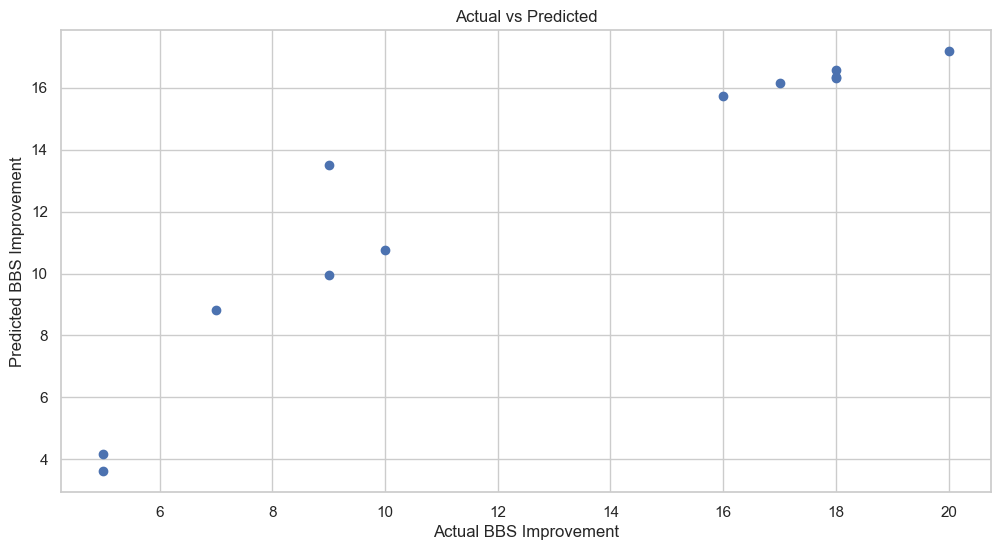

In [9]:
# ----------------------------- STEP 7: Predictive Modeling ----------------------------- #
features = ["AGE", "GENDER", "BBS_Day1", "TUG_Day1", "VRBESS_Day1", "BESTest_Day1", "SIS_Day1"]
target = "BBS_Improvement"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Actual vs Predicted Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual BBS Improvement")
plt.ylabel("Predicted BBS Improvement")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


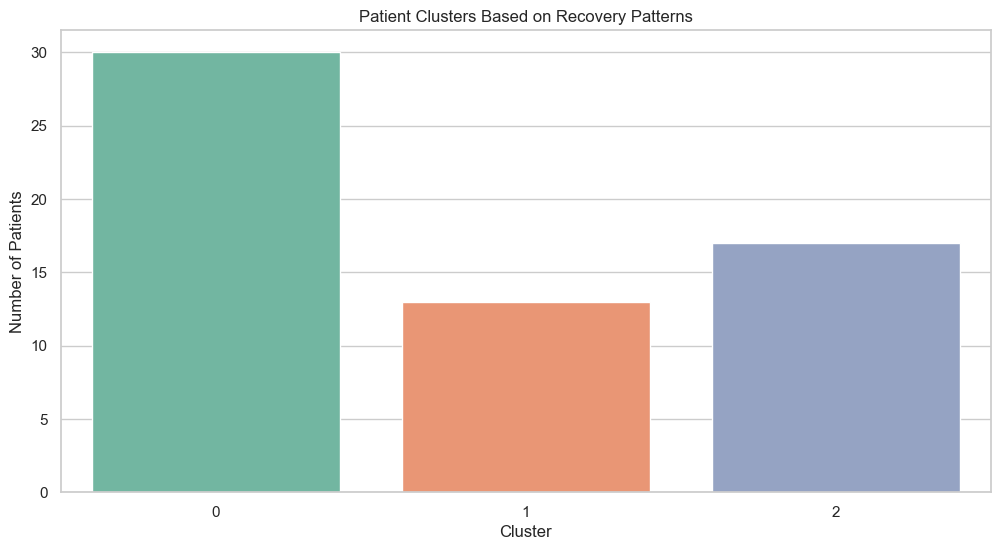

In [10]:
# ----------------------------- STEP 7b: Clustering Patients by Improvement ----------------------------- #
from sklearn.cluster import KMeans

# Cluster patients based on their 5 improvement scores
cluster_data = df[["BBS_Improvement", "TUG_Improvement", "VRBESS_Improvement", 
                   "BESTest_Improvement", "SIS_Improvement"]]

kmeans = KMeans(n_clusters=3, random_state=42)
df["Recovery_Cluster"] = kmeans.fit_predict(cluster_data)

sns.countplot(x="Recovery_Cluster", data=df, palette="Set2")
plt.title("Patient Clusters Based on Recovery Patterns")
plt.xlabel("Cluster")
plt.ylabel("Number of Patients")
plt.show()


In [11]:
# ----------------------------- STEP 7c: Defining Features and Model Variable ----------------------------- #
X = df[["AGE", "GENDER", "BBS_Day1", "TUG_Day1", "VRBESS_Day1", "BESTest_Day1", "SIS_Day1"]]
y = df["SIS_Week4"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-test split completed.")



Train-test split completed.


In [12]:
# ----------------------------- STEP 7d: Linear Regression Mode; ----------------------------- #
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f"Linear Regression - R2: {lr_r2:.3f}, RMSE: {lr_rmse:.3f}")




Linear Regression - R2: 0.780, RMSE: 1.780


In [14]:
# ----------------------------- STEP 7e: Random Forest Regressor with Hyper-Parameter Tuning ----------------------------- #
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [15]:
# ----------------------------- STEP 7f: Evaluation of best Random Forest Model ----------------------------- #
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print("Best Random Forest Parameters:", grid_search.best_params_)
print(f"Random Forest - R2: {rf_r2:.3f}, RMSE: {rf_rmse:.3f}")



Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - R2: 0.760, RMSE: 1.860


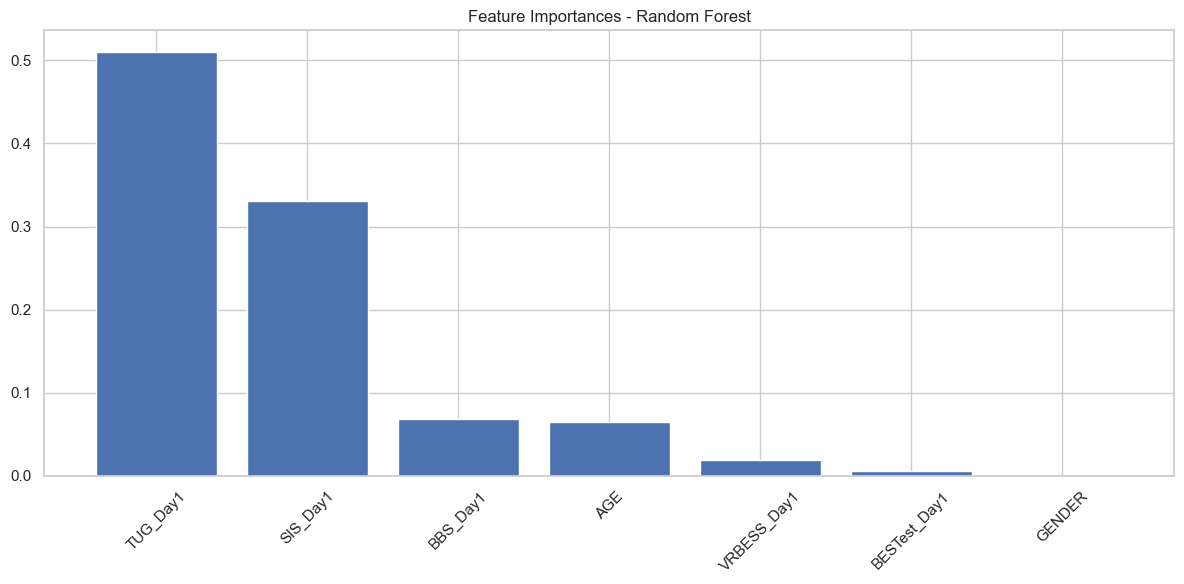

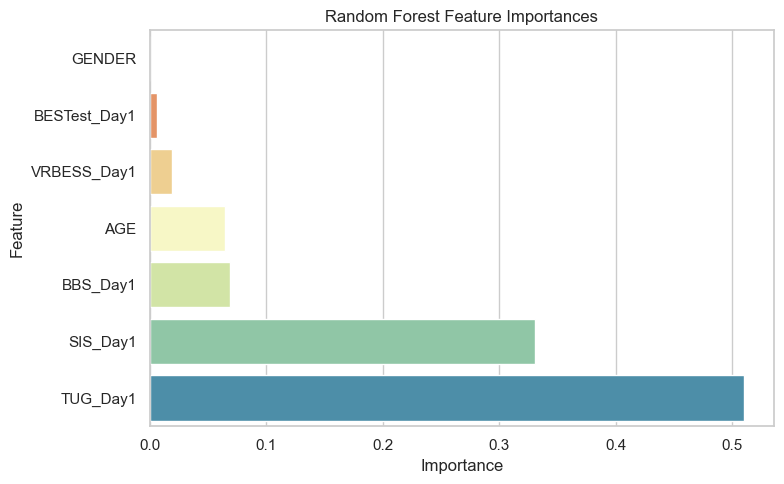

In [17]:
# ----------------------------- STEP 7g: Feature Importance Plot from Tuned Random Forest ----------------------------#
importances = best_rf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

# Plot sorted importances
plt.figure()
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), features[sorted_idx], rotation=45)
plt.tight_layout()
plt.show()

# seaborn-enhanced plot with labels
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette="Spectral")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()



In [31]:
# ----------------------------- STEP 7h: XGBoost with GridSearchCV ----------------------------- #
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='r2', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_xgb = grid_search.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)

print("📊 Tuned XGBoost Results:")
print("Best R² Score:", round(xgb_r2, 3))
print("Best RMSE:", round(xgb_rmse, 3))
print("Best Parameters:", grid_search.best_params_)


📊 Tuned XGBoost Results:
Best R² Score: 0.941
Best RMSE: 0.922
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


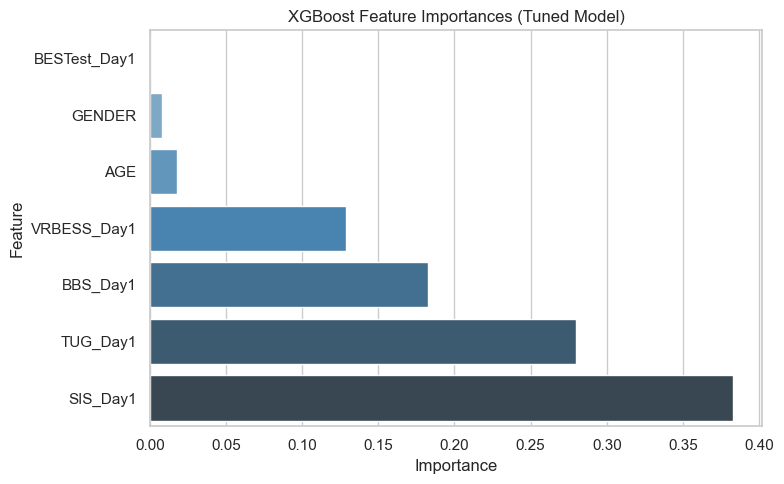

In [35]:
# ----------------------------- STEP 7i: XGBoost Feature Importance Plot ----------------------------- #
importances = best_xgb.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="Blues_d")
plt.title("XGBoost Feature Importances (Tuned Model)")
plt.tight_layout()
plt.show()


In [34]:
# ----------------------------- STEP 7j: Final Model Comparison Summary ----------------------------- #
print("🔍 Final Model Comparison:")

print(f"Linear Regression → R2: {lr_r2:.3f}, RMSE: {lr_rmse:.2f}")
print(f"Random Forest     → R2: {rf_r2:.3f}, RMSE: {rf_rmse:.2f}")
print(f"XGBoost           → R2: {xgb_r2:.3f}, RMSE: {xgb_rmse:.2f}")


🔍 Final Model Comparison:
Linear Regression → R2: 0.780, RMSE: 1.78
Random Forest     → R2: 0.760, RMSE: 1.86
XGBoost           → R2: 0.941, RMSE: 0.92


In [18]:
# ----------------------------- STEP 8: Export Processed Data ----------------------------- #
df.to_csv("Processed_Patient_Data.csv", index=False)
print("Processed data exported.")

Processed data exported.


In [44]:
# ----------------------------- STEP 9a: Display Patient Insights ----------------------------- #

def show_patient_insights(patient_id):
    """Displays charts, predictions, and improvements for a selected patient."""
    patient = df[df["SL.NO"] == patient_id]
    if patient.empty:
        print(f" No patient found with SL.NO {patient_id}")
        return

    assessments = ["BBS", "TUG", "VRBESS", "BESTest", "SIS"]
    before = [patient[f"{a}_Day1"].values[0] for a in assessments]
    after = [patient[f"{a}_Week4"].values[0] for a in assessments]
    improvement = [patient[f"{a}_Improvement"].values[0] for a in assessments]

    # Plot Before vs After Scores
    x = np.arange(len(assessments))
    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.2, before, width=0.4, label="Before", color='salmon')
    plt.bar(x + 0.2, after, width=0.4, label="After", color='mediumseagreen')
    plt.xticks(x, assessments)
    plt.title(f"Patient {patient_id} - Before vs After Scores")
    plt.ylabel("Assessment Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Improvement
    plt.figure(figsize=(10, 5))
    sns.barplot(x=assessments, y=improvement, palette="coolwarm")
    plt.axhline(0, color="black", linestyle="--")
    plt.title(f"Patient {patient_id} - Improvement per Assessment")
    plt.ylabel("Improvement")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 🔍 Show Key Info
    age = int(patient["AGE"].values[0])
    gender = "Male" if patient["GENDER"].values[0] == 1 else "Female"
    overall = patient["Overall_Improvement"].values[0]

    print(f" Patient ID: {patient_id} | Age: {age} | Gender: {gender}")
    print(f" Overall Improvement Score: {overall:.2f}")

    # Optional: Show prediction vs actual using the trained model
    features = patient[["AGE", "GENDER", "BBS_Day1", "TUG_Day1", "VRBESS_Day1", "BESTest_Day1", "SIS_Day1"]]
    predicted = best_xgb.predict(features)[0]
    actual = patient["SIS_Week4"].values[0]
    print(f" XGBoost Prediction (SIS Week 4): {predicted:.2f} | Actual: {actual:.2f}")

    # Optional NLP-style summary as bullet points
    print("Highlights:")
    for i, a in enumerate(assessments):
        direction = "↑" if a != "TUG" else "↓"
        change = improvement[i]
        if abs(change) > 1:
            print(f"• {a}: {direction} {abs(change):.1f} points")



In [51]:
# ----------------------------- STEP 9b: NLP Summary Generator ----------------------------- #

def generate_nlp_summary(patient_id):
    patient = df[df["SL.NO"] == patient_id]
    if patient.empty:
        return "Patient not found."

    assessments = ["BBS", "TUG", "VRBESS", "BESTest", "SIS"]
    name_map = {
        "BBS": "balance and coordination",
        "TUG": "mobility and speed",
        "VRBESS": "vestibular balance",
        "BESTest": "overall balance assessment",
        "SIS": "perceived stroke impact"
    }

    day1_scores = [patient[f"{a}_Day1"].values[0] for a in assessments]
    week4_scores = [patient[f"{a}_Week4"].values[0] for a in assessments]
    improvements = [patient[f"{a}_Improvement"].values[0] for a in assessments]

    age = int(patient["AGE"].values[0])
    gender = "Male" if patient["GENDER"].values[0] == 1 else "Female"
    overall = patient["Overall_Improvement"].values[0]

    summary = f"This summary is for a {age}-year-old {gender} patient. "
    summary += "Here’s how the patient’s condition changed over the 4-week treatment period:"

    for i, a in enumerate(assessments):
        domain = name_map[a]
        before = day1_scores[i]
        after = week4_scores[i]
        diff = improvements[i]
        direction = "improved" if (a != "TUG" and diff > 0) or (a == "TUG" and diff > 0) else "worsened"
        summary += f"• {a} ({domain}) score changed from {before:.1f} to {after:.1f} → {direction} by {abs(diff):.1f} points."

    summary += "Overall, the patient "

    if overall > 10:
        summary += "made significant improvement across multiple domains."
    elif overall > 5:
        summary += "showed a moderate level of recovery and functional gains."
    elif overall > 0:
        summary += "had mild progress but may require further support."
    else:
        summary += "did not show measurable improvement."

    return summary


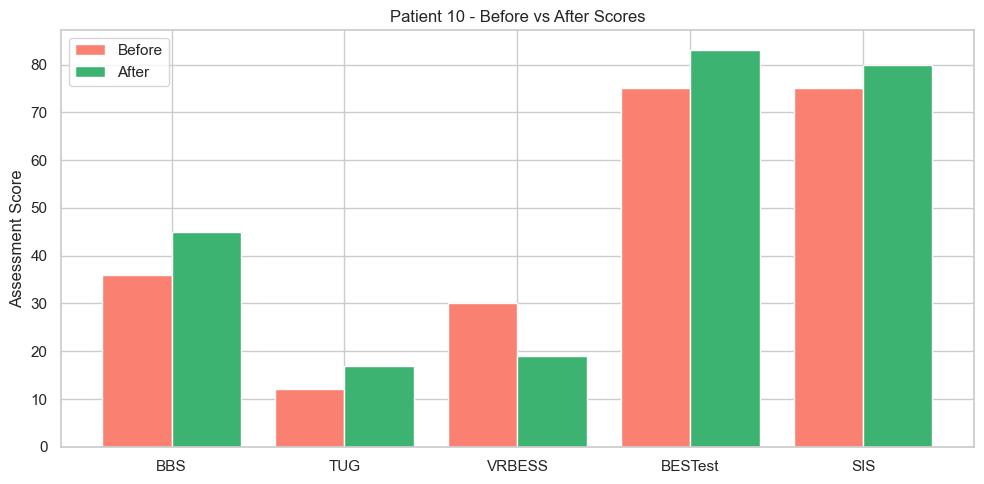

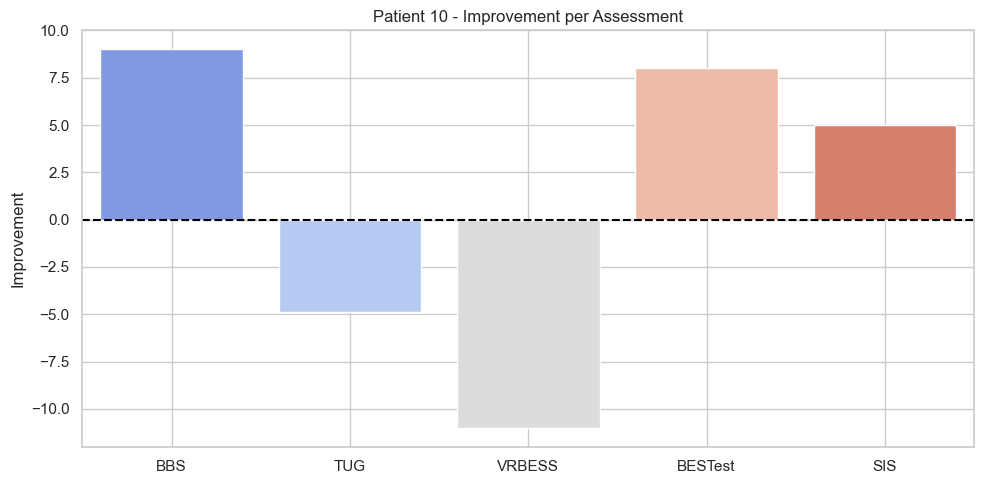

 Patient ID: 10 | Age: 74 | Gender: Male
 Overall Improvement Score: 6.14
 XGBoost Prediction (SIS Week 4): 79.94 | Actual: 80.00
Highlights:
• BBS: ↑ 9.0 points
• TUG: ↓ 4.9 points
• VRBESS: ↑ 11.0 points
• BESTest: ↑ 8.0 points
• SIS: ↑ 5.0 points


'This summary is for a 74-year-old Male patient. Here’s how the patient’s condition changed over the 4-week treatment period:• BBS (balance and coordination) score changed from 36.0 to 45.0 → improved by 9.0 points.• TUG (mobility and speed) score changed from 12.1 to 17.0 → worsened by 4.9 points.• VRBESS (vestibular balance) score changed from 30.0 to 19.0 → worsened by 11.0 points.• BESTest (overall balance assessment) score changed from 75.0 to 83.0 → improved by 8.0 points.• SIS (perceived stroke impact) score changed from 75.0 to 80.0 → improved by 5.0 points.Overall, the patient showed a moderate level of recovery and functional gains.'

In [52]:
# ------------------------------ Step10: Generating Patient Results -----------------------------#

show_patient_insights(10)
generate_nlp_summary(10)
